## Aula 1 - Gráficos com Seaborn e Story Telling


### Vamos estudar algumas (poucas) opções de configuração dos gráficos do Seaborn. 

*   Remover Clutter
*   Adicionar Label aos eixos
*   Remover as bordas do gráfico
*   Ajustar a cor de fundo
*   Definir o intervalo numérico dos eixos
*   Definir os ticks dos eixos

Investiremos mais tempo adiquirindo habilidades de Storytelling no Data Studio e no Observable. Por que?


### Importar as bibliotecas

In [1]:
import numpy as np # Importar o numpy
import seaborn as sns # Importar o seaborn
import matplotlib.pyplot as plt # importar o matplotlib
import pandas as pd


### O dataset deste estudo de caso: [Aquecimento Global](https://data.giss.nasa.gov/gistemp/graphs_v3/)

In [13]:
# 1) Ler o dataset que está em "https://data.giss.nasa.gov/gistemp/graphs_v3/graph_data/GISTEMP_Seasonal_Cycle_since_1880/graph.csv" (o dataset foi retirado do gráfico)

df = pd.read_csv("https://data.giss.nasa.gov/gistemp/graphs_v3/graph_data/GISTEMP_Seasonal_Cycle_since_1880/graph.csv", skiprows=1, dtype={"Year": str})
df.head()


,Year,Anomaly
0,1880.04,-2.70
1,1880.13,-2.33
2,1880.21,-1.58
3,1880.29,-0.67
4,1880.38,0.35


In [14]:
# 2) Fazer transformações necessárias nas colunas. Coloque o ano numa coluna e o mês em outra. O mês está num formato numérico que não coincide com nosso calendário.
df[['ano', 'mes']] = df['Year'].str.split('.', 1, expand=True)
df['ano'] = df['ano'].astype(np.int64)
map_mes = {'04': 'jan', '13': 'fev', '21': 'mar', '29': 'abr', '38': 'mai', '46': 'jun', '54': 'jul', '63': 'ago', '71': 'set', '79': 'out', '88': 'nov', '96': 'dez'}
df['mes'] = df['mes'].map(map_mes)
df['mes'] = pd.Categorical(df['mes'], ordered=True, categories=['jan', 'fev', 'mar', 'abr', 'mai', 'jun', 'jul', 'ago', 'set', 'out', 'nov', 'dez'])
del df['Year']
df.head()

,Anomaly,ano,mes
0,-2.70,1880,jan
1,-2.33,1880,fev
2,-1.58,1880,mar
3,-0.67,1880,abr
4,0.35,1880,mai


### Sobre este assunto, existe uma bonita visualização de dados usando uma técnica chamada scrolltelling [aqui](https://www.bloomberg.com/graphics/2015-whats-warming-the-world/) 

### Metadados para entender o dataset encontram-se disponíveis [aqui](https://data.giss.nasa.gov/gistemp/). O trecho de texto abaixo foi retirado desse link:
##### *The following are plain-text files in tabular format of temperature anomalies, i.e. deviations from the corresponding 1951-1980 means.*
*   *Global-mean monthly, seasonal, and annual means, 1880-present, updated through most recent month* 

## Opções e Configurações do Seaborn e Matplotlib
### O seaborn tem 4 configurações de estilo pré-definidas. darkgrid, whitegrid, dark, white (fundo branco sem grids), e ticks
#### Vamos estudar como remover clutter (desordem/excesso de informação) nos gráficos do Seaborn


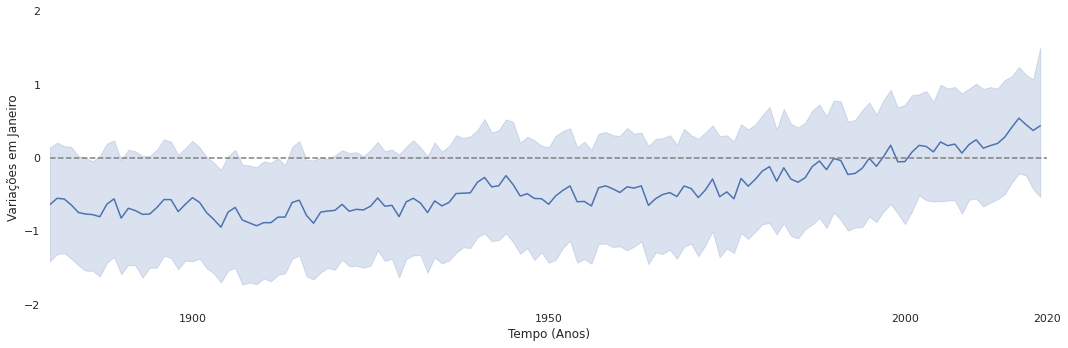

In [16]:
# 3) Ajuste o estilo dos gráficos do seaborn para white utilizando a função set_theme
sns.set_theme(style="white") # Função para ajustar o tema: estilo, contexto
# O seaborn tem vários estilos: darkgrid, whitegrid, dark, white (fundo branco sem grids), and ticks

# 4) Plote um gráfico de linhas
g = sns.relplot(kind='line', data=df, x='ano', y='Anomaly', aspect=3, legend="full")
# O argumento aspect altera a proporção entre a altura e largura do gráfico
# O método relplot consegue plotar Grids de plots. Pra isso ele usa qualquer dos gráficos que 
# relacional (rel) duas variáveis, por exemplo, o scatterplot ou o lineplot

# 5) Auste os labels dos eixos x e y com a função set_axis_labels (do objeto FacetGrid retornado pelo relplot)
g.set_axis_labels("Tempo (Anos)", "Variações em Janeiro")

# 6) Ajuste os limites e os ticks dos eixos x e y com a função set (do objeto FacetGrid retornado pelo relplot)
g.set(xlim=(1880, 2020), ylim=(-2, 2), xticks=[1900, 1950, 2000, 2020], yticks=[-2, -1, 0, 1, 2])

# 7) Trace uma linha de referencia em y=0, com a função refline (do objeto FacetGrid retornado pelo relplot)
g.refline(y=0)

# 8) Remova todas as bordas do gráfico com a função despine
# A função despine remove as bordas do gráfico. Aceita os argumentos booleanos top, right, left e bottom.
sns.despine(bottom=True, left=True)


In [5]:
# Métodos agregadores, como catplot, lmplot e relplot, retornam um objeto do tipo FacetGrid
# Esse objeto consegue gerar sub-plots em linhas e colunas. 
# É o objeto que implementa as funcionalidades dos argumentos col e hue.
print(type(g))

<class 'seaborn.axisgrid.FacetGrid'>


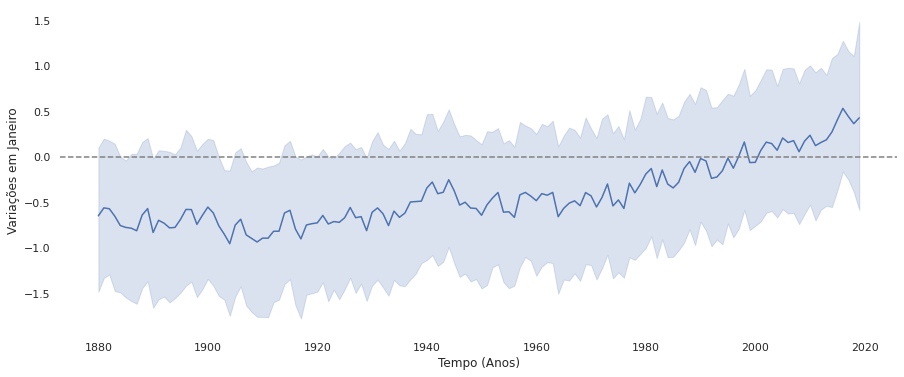

In [17]:
# Plotando a mesma figura com o metodo lineplot. Ele retorna um objeto Axes do matplotlib
# 9) Defina o tamanho da figura
plt.figure(figsize=(15,6))

# 10) Plote um gráfico de linha com o ano no eixo x e o valor da coluna Anomaly no eixo y. 
# Guarde o objeto Axes retornado pelo metodo lineplot numa variável para uso posterior.
ax = sns.lineplot(data=df, x='ano', y='Anomaly')

# 11) Remova as bordas do gráfico
sns.despine(left=True, bottom=True)

# 12) Ajuste os labels do gráfico
ax.set_xlabel("Tempo (Anos)", fontsize = 12)
ax.set_ylabel("Variações em Janeiro", fontsize = 12)

# 13) Trace uma linha de referência em y=0
plt.axhline(y=0.0, color='grey', linestyle='--')

## Vamos tentar reproduzir o gráfico a seguir.
### Disponível [aqui](https://data.giss.nasa.gov/gistemp/graphs_v3/).


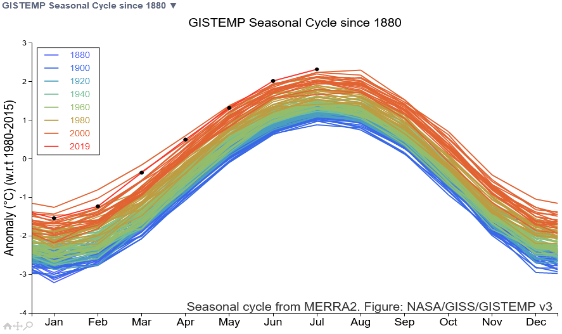

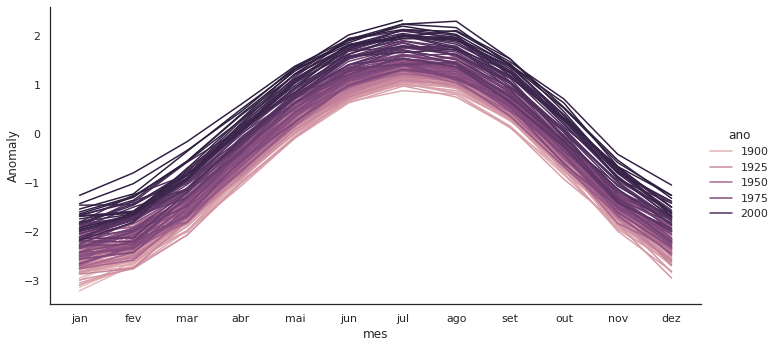

In [18]:
# 14) Plote o gráfico da figura acima
sns.relplot(kind='line', data=df, hue='ano', x='mes', y='Anomaly', aspect=2)

## Como ajustar a cor de uma categoria, caso você tenha uma mensagem para a sua audiência sobre esta categoria

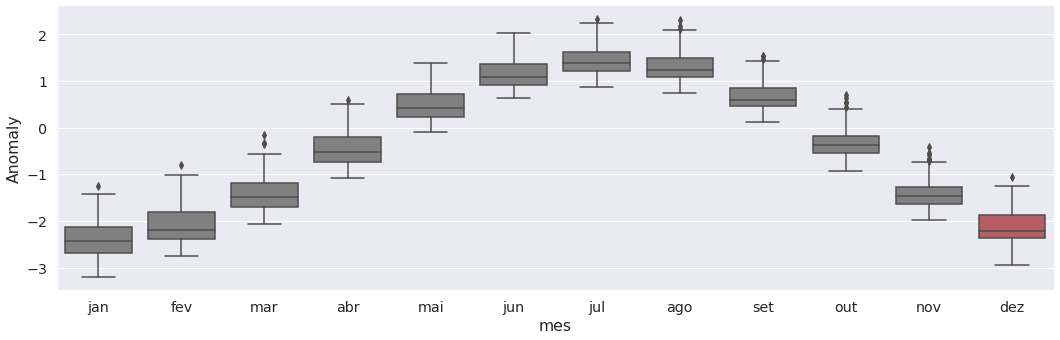

In [26]:
# Aumentar o tamanho da fonte
# Como alterar o tamanho da fonte
sns.set(font_scale=1.3)

my_pal = {i: "r" if i in ['dez'] else "gray" for i in df['mes'].unique()}
g = sns.catplot(y="Anomaly", data=df, kind="box", x="mes", aspect=3, palette=my_pal)

## Vamos tentar reproduzir este [gráfico](http://berkeleyearth.org/dv/temperature-change-vs-carbon-dioxide-concentration/) que mostra a correlação entre o aumento de emissão de CO2 e o aumento médio da temperatura global.
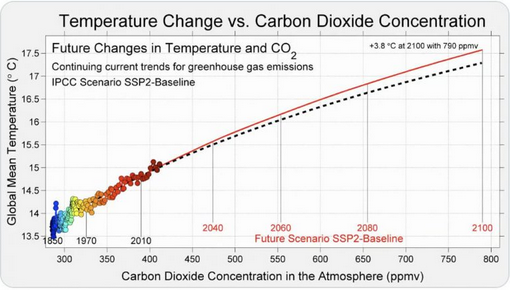

In [ ]:
# Fonte: https://ourworldindata.org/co2-and-other-greenhouse-gas-emissions
# Vamos usar a variável da coluna co2
dfco2_orig = pd.read_csv("https://raw.githubusercontent.com/owid/co2-data/master/owid-co2-data.csv")
dfco2_orig

,iso_code,country,year,co2,consumption_co2,co2_growth_prct,co2_growth_abs,trade_co2,co2_per_capita,consumption_co2_per_capita,share_global_co2,cumulative_co2,share_global_cumulative_co2,co2_per_gdp,consumption_co2_per_gdp,co2_per_unit_energy,coal_co2,cement_co2,flaring_co2,gas_co2,oil_co2,other_industry_co2,cement_co2_per_capita,coal_co2_per_capita,flaring_co2_per_capita,gas_co2_per_capita,oil_co2_per_capita,other_co2_per_capita,trade_co2_share,share_global_cement_co2,share_global_coal_co2,share_global_flaring_co2,share_global_gas_co2,share_global_oil_co2,share_global_other_co2,cumulative_cement_co2,cumulative_coal_co2,cumulative_flaring_co2,cumulative_gas_co2,cumulative_oil_co2,cumulative_other_co2,share_global_cumulative_cement_co2,share_global_cumulative_coal_co2,share_global_cumulative_flaring_co2,share_global_cumulative_gas_co2,share_global_cumulative_oil_co2,share_global_cumulative_other_co2,total_ghg,ghg_per_capita,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,population,gdp,primary_energy_consumption,energy_per_capita,energy_per_gdp
0,AFG,Afghanistan,1949,0.015,NaN,NaN,NaN,NaN,0.002,NaN,0.00,0.015,0.00,NaN,NaN,NaN,0.015,NaN,NaN,NaN,NaN,NaN,NaN,0.002,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,0.015,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7624058.0,NaN,NaN,NaN,NaN
1,AFG,Afghanistan,1950,0.084,NaN,475.00,0.070,NaN,0.011,NaN,0.00,0.099,0.00,0.009,NaN,NaN,0.021,NaN,NaN,NaN,0.063,NaN,NaN,0.003,NaN,NaN,0.008,NaN,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.036,NaN,NaN,0.063,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7752117.0,9.421400e+09,NaN,NaN,NaN
2,AFG,Afghanistan,1951,0.092,NaN,8.70,0.007,NaN,0.012,NaN,0.00,0.191,0.00,0.010,NaN,NaN,0.026,NaN,NaN,NaN,0.066,NaN,NaN,0.003,NaN,NaN,0.008,NaN,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.061,NaN,NaN,0.129,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7840151.0,9.692280e+09,NaN,NaN,NaN
3,AFG,Afghanistan,1952,0.092,NaN,0.00,0.000,NaN,0.012,NaN,0.00,0.282,0.00,0.009,NaN,NaN,0.032,NaN,NaN,NaN,0.060,NaN,NaN,0.004,NaN,NaN,0.008,NaN,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.093,NaN,NaN,0.189,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7935996.0,1.001732e+10,NaN,NaN,NaN
4,AFG,Afghanistan,1953,0.106,NaN,16.00,0.015,NaN,0.013,NaN,0.00,0.388,0.00,0.010,NaN,NaN,0.038,NaN,NaN,NaN,0.068,NaN,NaN,0.005,NaN,NaN,0.008,NaN,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.131,NaN,NaN,0.257,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8039684.0,1.063052e+10,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24646,ZWE,Zimbabwe,2015,12.170,13.308,1.65,0.198,1.138,0.881,0.963,0.03,726.480,0.05,0.579,0.633,0.219,8.035,0.504,NaN,NaN,3.631,NaN,0.036,0.582,NaN,NaN,0.263,NaN,9.35,0.04,0.05,NaN,NaN,0.03,NaN,17.478,577.422,NaN,NaN,131.580,NaN,0.05,0.08,NaN,NaN,0.02,NaN,67.49,4.885,11.87,0.859,6.68,0.484,13814642.0,2.102746e+10,55.642,4027.628,2.223
24647,ZWE,Zimbabwe,2016,10.815,12.171,-11.14,-1.356,1.356,0.771,0.868,0.03,737.295,0.05,0.516,0.581,0.228,7.061,0.581,NaN,NaN,3.173,NaN,0.041,0.503,NaN,NaN,0.226,NaN,12.54,0.04,0.05,NaN,NaN,0.03,NaN,18.059,584.482,NaN,NaN,134.753,NaN,0.05,0.08,NaN,NaN,0.02,NaN,65.98,4.703,11.92,0.850,6.55,0.467,14030338.0,2.096179e+10,47.500,3385.574,1.889
24648,ZWE,Zimbabwe,2017,10.247,11.774,-5.25,-0.568,1.527,0.720,0.827,0.03,747.542,0.05,0.467,0.536,NaN,6.383,0.581,NaN,NaN,3.283,NaN,0.041,0.448,NaN,NaN,0.231,NaN,14.90,0.04,0.04,NaN,NaN,0.03,NaN,18.640,590.865,NaN,NaN,138.036,NaN,0.05,0.08,NaN,NaN,0.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14236599.0,2.194784e+10,NaN,NaN,NaN
24649,ZWE,Zimbabwe,2018,11.341,12.815,10.67,1.094,1.475,0.785,0.888,0.03,758.882,0.05,0.499,0.564,NaN,7.369,0.581,NaN,NaN,3.390,NaN,0.040,0.510,NaN,NaN,0.235,NaN,13.01,0.04,0.05,NaN,NaN,0.03,NaN,19.222,598.234,NaN,NaN,141.426,NaN,0.05,0.08,NaN,NaN,0.02,NaN,NaN,NaN,NaN,NaN,

In [ ]:
# Vamos agregar pelo ano e somar a emissão de co2 
# Transforme a serie agregada num dataframe e converta indice para coluna
dfco2g = dfco2_orig.groupby('year')['co2'].sum().to_frame().reset_index()
dfco2g.head()

,year,co2
0,1750,46.755
1,1751,46.755
2,1752,46.770
3,1753,46.770
4,1754,46.790


In [ ]:
# Faça o merge dos dois dataframes: de temperatura e de CO2
dfmerge = df.merge(dfco2g, left_on='ano', right_on='year')

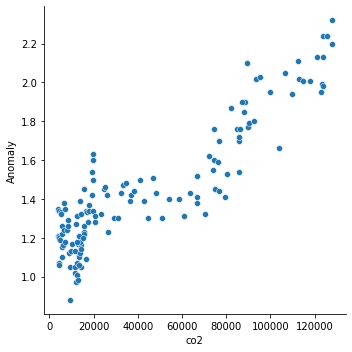

In [ ]:
# Plote um grafico scatter das duas variáveis de interesse.
# Qual intervalo de valores você usaria? Qual subconjunto de pontos do dataset? Por que?
sns.relplot(kind='scatter', data=dfmerge[dfmerge['mes']=='54'], y='Anomaly', x='co2')

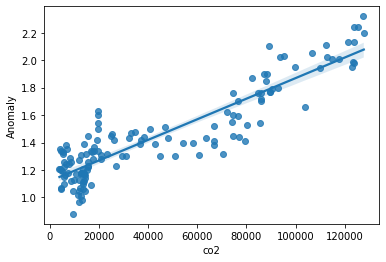

In [ ]:
# Plote a reta da regressão linear usando a função regplot do seaborn
sns.regplot(data=dfmerge[dfmerge['mes']=='54'], y='Anomaly', x='co2')

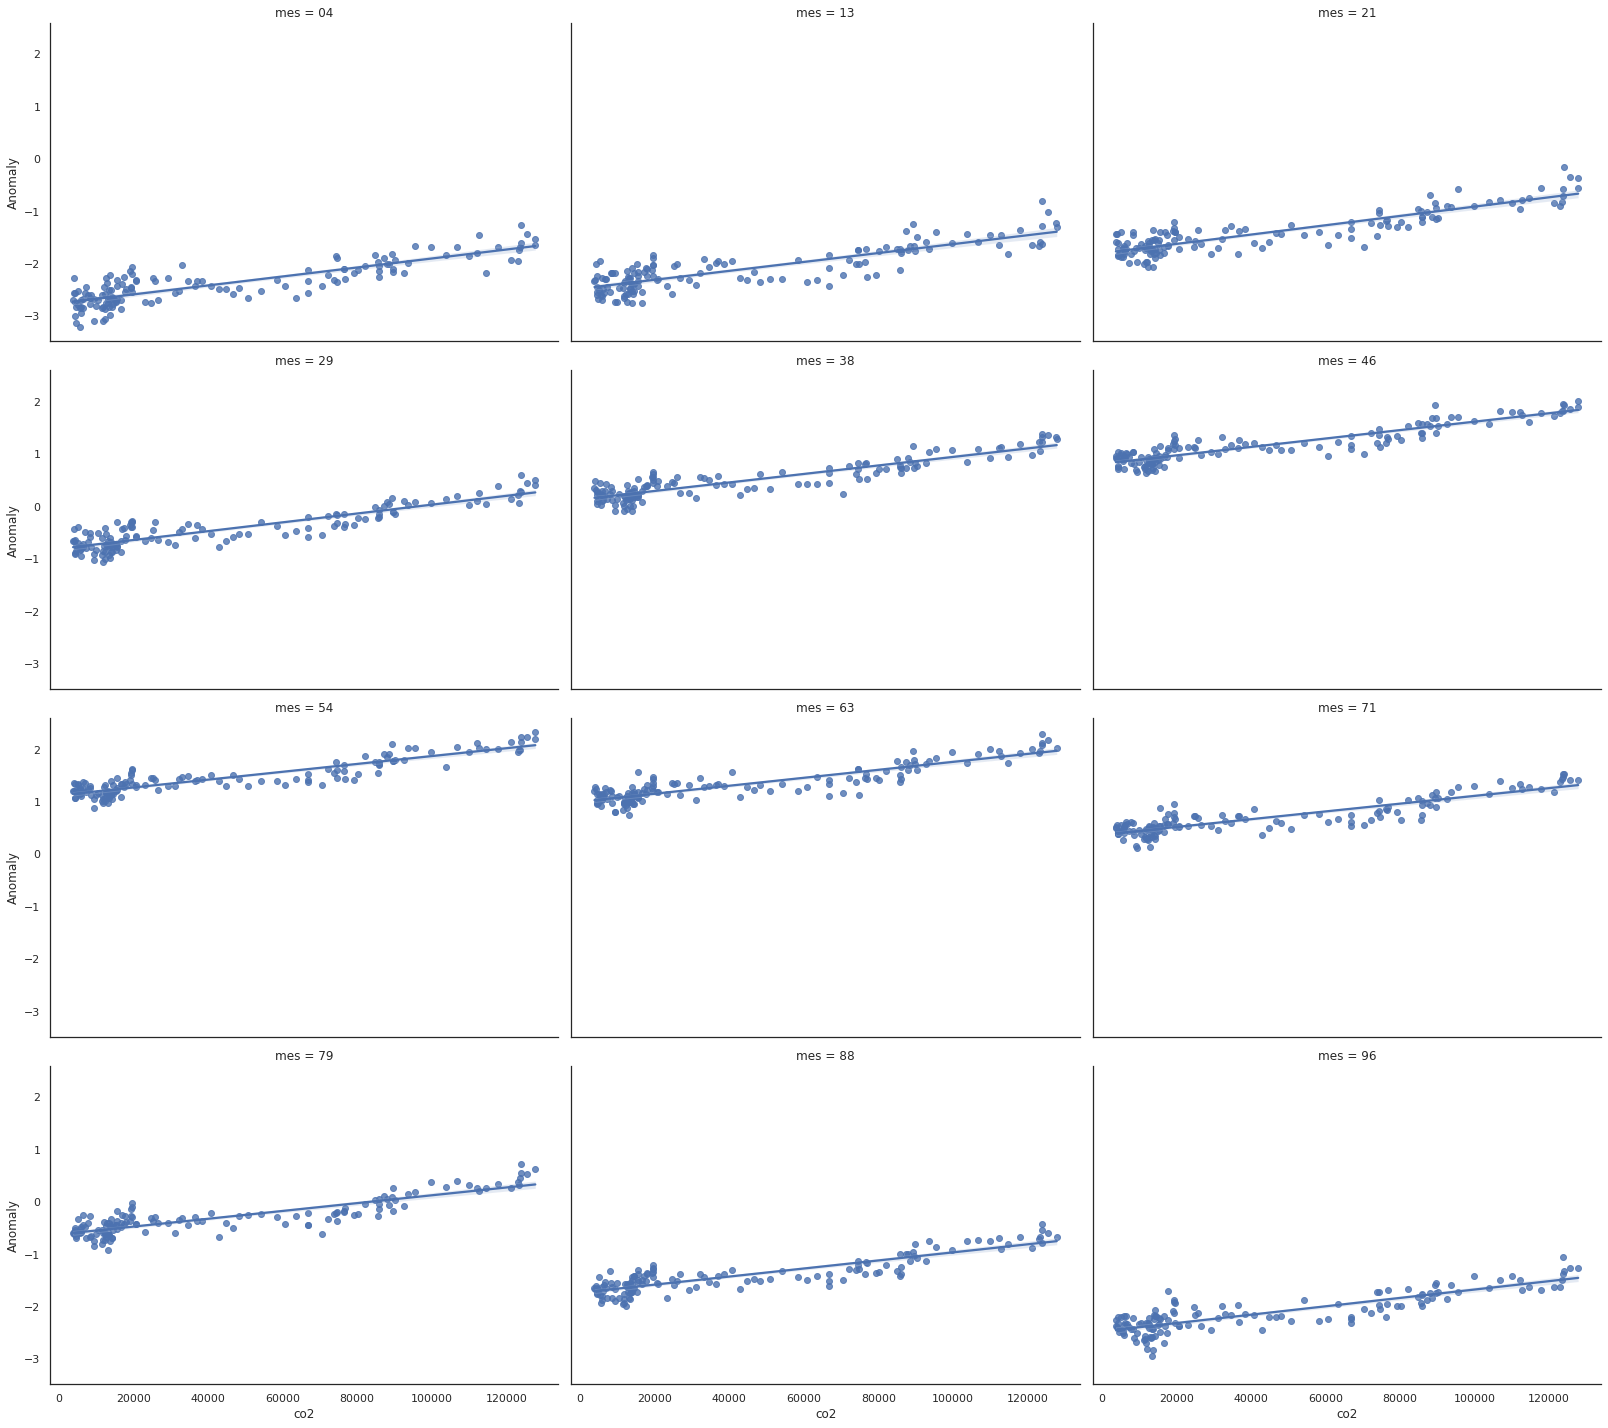

In [ ]:
# Plote um grid de gráficos de regressão linear usando o método lmplot do seaborn. Qual argumento usar para separar as colunas? Qual valor passar nesse argumento?
sns.lmplot(data=dfmerge, y='Anomaly', x='co2', col_wrap=3, col='mes', aspect=1.5)

In [28]:
# O código abaixo encontra o modelo de regressão linear e retorna o R2 e o P-value de séries de valores agrupadas por mês.
import statsmodels.api as sm
import pandas as pd
import numpy as np

def ols_res(x, y):
    model = sm.OLS(y, x).fit()
    return [model.rsquared, model.f_pvalue]

df.groupby('mes').apply(lambda x : x[['ano']].apply(ols_res, y=x['Anomaly']))


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


ano
mes                 
jan 0   9.670428e-01
    1  6.828993e-105
fev 0   9.587132e-01
    1   4.340713e-98
mar 0   9.178220e-01
    1   2.651566e-77
abr 0   5.656866e-01
    1   6.002821e-27
mai 0   6.743762e-01
    1   1.115567e-35
jun 0   9.288471e-01
    1   1.182601e-81
jul 0   9.594275e-01
    1   1.290155e-98
ago 0   9.493916e-01
    1   2.714460e-91
set 0   8.324250e-01
    1   2.192080e-55
out 0   4.291679e-01
    1   1.621607e-18
nov 0   9.357522e-01
    1   3.869241e-84
dez 0   9.656224e-01
    1  6.945141e-103

## Atividade Prática em aula 
### Repita o gráfico Seasonal Changes presente nesse link http://berkeleyearth.lbl.gov/regions/global-land.

### Não precisa ficar igual, porém, quanto mais você se aproximar, maior será o seu domínio sobre o seaborn e o matplotlib. É uma oportunidade para você treinar sua capacidade de pesquisar uma solução para um problema específico.

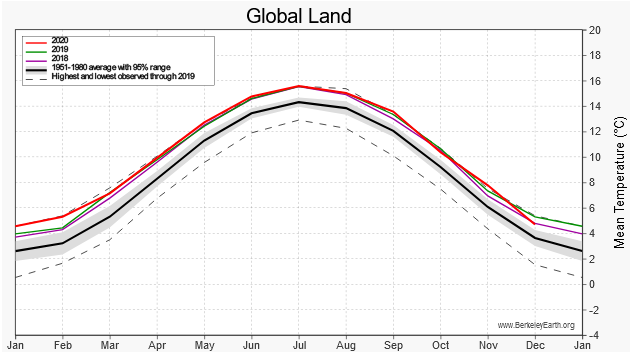

#### Plote as séries de 2016 a 2019 separadamente (não temos as série 2020 no nosso dataset). E uma linha média com seu intervalo de confiança de 95% para os outros anos do dataset.
#### Você vai precisar dos dados de máximo e mínimo para o ano de 2019. Podem ser encontrados [aqui](http://berkeleyearth.lbl.gov/auto/Global/Complete_TMAX_complete.txt) e [aqui](http://berkeleyearth.lbl.gov/auto/Global/Complete_TMIN_complete.txt). 

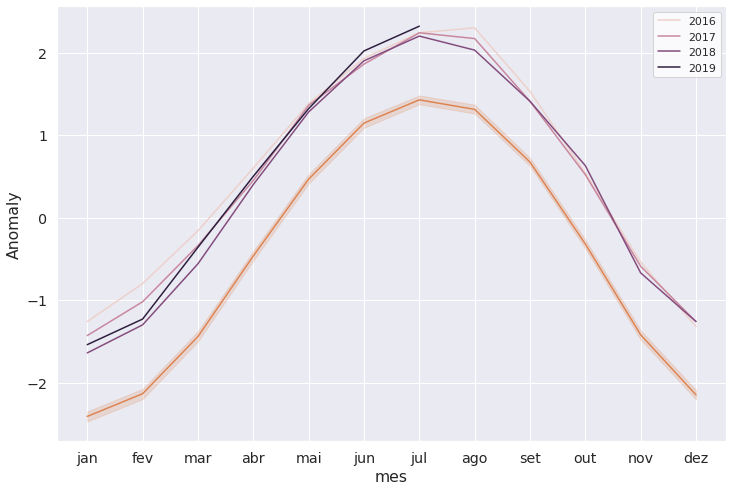

In [27]:
# Dica você pode plotar várias séries no mesmo gráfico. Comece executando a função subplots do matplotlib
# para criar um objeto figure e um objeto Axes
fig, ax = plt.subplots()

# Se quiser alterar o tamanho do gráfico, utilize a função set_size_inches
fig.set_size_inches(12,8)

# Na sequencia, para cada série/gráfico que quiser plotar, para para uma função de gráfico do seaborn o objeto Axes (ax) como argumento 
# Exemplo: Se você fosse plotar um grafico de barras: sns.barplot(data=df,ax=ax, x='mes', y='Anomaly')
sns.set_theme(style="whitegrid")
sns.lineplot(data=df[df['ano'].isin([2019,2018,2017,2016])], ax=ax, hue='ano', x='mes', y='Anomaly')
sns.lineplot(data=df[~df['ano'].isin([2019,2018,2017,2016])], ax=ax, x='mes', y='Anomaly')

In [ ]:
# !pip install pandas-profiling==2.8.0

In [ ]:
# from pandas_profiling import ProfileReport
# profile = ProfileReport(df, title="Report")
# profile

Output hidden; open in https://colab.research.google.com to view.